# Assignment 11
## Gal Dali

### Question 1

#### The Wiener process

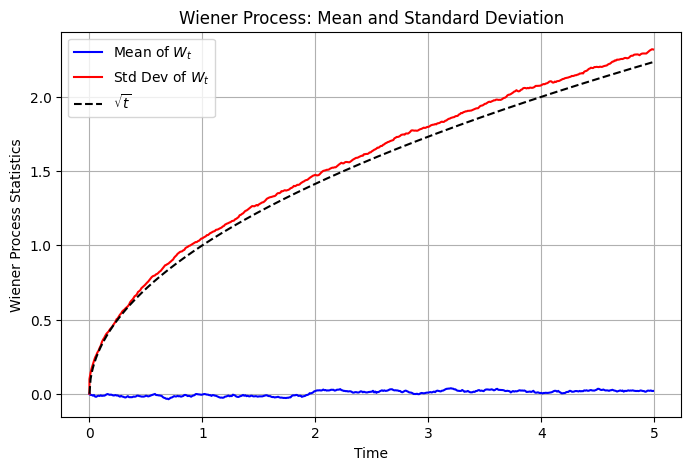

In [20]:
import numpy as np

dt = 0.01
T = 5
realizations = 1000
times = np.arange(0, T, dt)
dw = np.random.normal(0, np.sqrt(dt), (realizations, len(times)))
W = np.cumsum(dw, axis=1)
W = np.hstack((np.zeros((realizations, 1)), W))  # Add W_0 = 0
times = np.insert(times, 0, 0)  # Ensure time array aligns


average = np.mean(W, axis=0)
std_dev = np.std(W, axis=0)

# plot the average and the standard deviation of the position as a function of time
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(times, average, label='Mean of $W_t$', color='blue')
plt.plot(times, std_dev, label='Std Dev of $W_t$', color='red')
plt.plot(times, np.sqrt(times), 'k--', label=r'$\sqrt{t}$')
plt.xlabel('Time')
plt.ylabel('Wiener Process Statistics')
plt.legend()
plt.grid(True)
plt.title('Wiener Process: Mean and Standard Deviation')
plt.show()

### Question 2

#### Euler-Maruyama method

$ dx = -b x \cdot ln(x) \cdot dt + cx \cdot dw $

$ x_0 = 0 $

#### part A: Ito's formula

$ dy = \frac{\partial y}{\partial t} dt + \frac{\partial y}{\partial x} dx + \frac{1}{2} \frac{\partial^2 y}{\partial x^2} dx^2 $

$ dy = \left(\frac{\partial y}{\partial t} + g(x,t)y' + \frac{1}{2} f^2(x, t) y'' \right) dt + f(x,t)y' dw $

$ y(x, t) := e^{bt} \cdot ln(x) $

$ \frac{\partial y}{\partial t} = b \cdot e^{bt} \cdot ln(x) $

$ \frac{\partial y}{\partial x} = y' = \frac{e^{bt}}{x} $

$ \frac{\partial^2 y}{\partial x^2} = y'' = -\frac{e^{bt}}{x^2} $

$ g(x, t) = -bx \cdot ln(x) $

$ f(x, t) = cx $

$ \text{Using Ito's formula: } $

$ dy = \left(b \cdot e^{bt} \cdot ln(x) + -bx \cdot ln(x) \frac{e^{bt}}{x} + \frac{1}{2} c^2x^2 (-\frac{e^{bt}}{x^2}) \right) dt + cx \frac{e^{bt}}{x} dw $

$ dy = -\frac{c^2e^{bt}}{2} dt + c \cdot e^{bt} dw $

$ y = -\frac{c^2 e^{bt}}{2b} + c \int e^{bt} dw $

$ e^{bt} \cdot ln(x) = y = -\frac{c^2 e^{bt}}{2b} + c \int e^{bt} dw $

$ ln(x) = -\frac{c^2}{2b} + e^{-bt}c \int e^{bt'} dw $

$ x = e^{-\frac{c^2}{2b}} \cdot e^{e^{-bt}c \int e^{bt'} dw} $

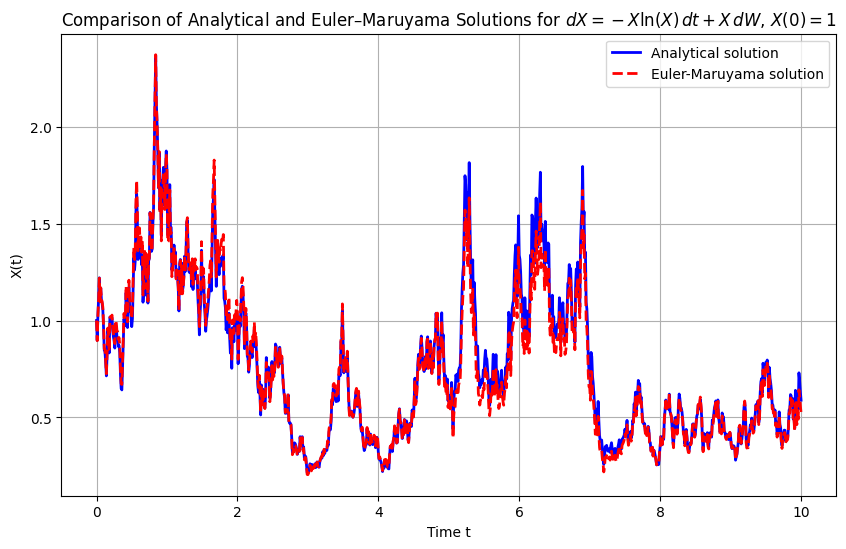

In [21]:
import numpy as np
import matplotlib.pyplot as plt

dt = 0.01
T = 10
N = int(T/dt)
t_grid = np.linspace(0, T, N+1)

b_param = 1.0
c_param = 1.0

X0 = 1.0

dw = np.random.normal(0, np.sqrt(dt), N)
W = np.concatenate(([0], np.cumsum(dw)))

exp_ts = np.exp(t_grid[:-1])
I = np.cumsum(exp_ts * dw)
I = np.concatenate(([0], I))

lnX_analytical = -0.5 * (1 - np.exp(-t_grid)) + np.exp(-t_grid) * I
X_analytical = np.exp(lnX_analytical)

X_em = np.zeros(N+1)
X_em[0] = X0
for i in range(N):
    X_em[i+1] = X_em[i] + (-X_em[i] * np.log(X_em[i])) * dt + X_em[i] * dw[i]

plt.figure(figsize=(10, 6))
plt.plot(t_grid, X_analytical, label='Analytical solution', lw=2, color='blue')
plt.plot(t_grid, X_em, 'r--', label='Euler-Maruyama solution', lw=2)
plt.xlabel('Time t')
plt.ylabel('X(t)')
plt.title('Comparison of Analytical and Euler–Maruyama Solutions for $dX=-X\\ln(X)\\,dt+X\\,dW$, $X(0)=1$')
plt.legend()
plt.grid(True)
plt.show()
